In [1]:
# import required dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats

In [2]:
# read the datafile
df = pd.read_csv('blockbusters.csv')
df.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018


In [3]:
# print("Data types before conversion:")
# print(df.dtypes)

# clean up world_wide gross column and convert to integer
df["worldwide_gross"] = df['worldwide_gross'].replace({'\$' : '', ',' : ''}, regex=True).astype(float)
df

# print("Data types after conversion:")
# print(df.dtypes)

# get stats of worldwide_gross across all studios
#top_studios_df = df.groupby('studio', as_index=False)['worldwide_gross'].mean()
#top_studios_df = df.groupby('studio', as_index=False)['title'].count()
#top_studios_rating_df = df.groupby('studio').agg({'imdb_rating': ['mean','min','max']})
top_studios_gross_df = df.groupby('studio').agg({'worldwide_gross': ['mean', 'min', 'max']})
top_studios_gross_df

# adjust formatting to make easier to read and sort from highest to lowest
#sorted_studios_df = top_studios_df[['studio','worldwide_gross']].sort_values(['worldwide_gross'], ascending=False)
#sorted_studios_df

#pd.options.display.float_format = '{:,.2f}'.format
#formatted_studios = top_studios_df[['studio','worldwide_gross'].apply(lambda x: '{:,.2f}'.format(x))]
#formatted_studios

worldwide_gross                           
                                         mean          min           max
studio                                                                  
20th Century Fox                 4.214770e+08   51079064.0  2.749064e+09
Columbia Pictures                3.451516e+08   35000000.0  8.908716e+08
DreamWorks                       5.089923e+08  291420351.0  9.198388e+08
Embassy Pictures                 4.236558e+07   42365581.0  4.236558e+07
IFC Films                        3.687440e+08  368744044.0  3.687440e+08
Lionsgate Films                  6.100008e+08  252583617.0  8.649130e+08
Metro-Goldwyn-Mayer              2.002916e+08   38251425.0  1.108561e+09
National Air and Space Museum    8.660000e+07   86600000.0  8.660000e+07
Newmarket Films                  6.118994e+08  611899420.0  6.118994e+08
Paramount Pictures               3.589809e+08   52614445.0  1.843201e+09
Pixar                            5.920101e+08  356461711.0  8.678940e+08
Sony Pictures                    2.964398e+08  150415432.0  5.198433e+08
Sunn Classic Pictures            5.570000e+07   55700000.0  5.570000e+07
Universal Pictures               3.074950e+08   34673100.0  9.707619e+08
Walt Disney Pictures             5.122966e+08   36853000.0  1.518595e+09
Warner Bros                      4.136588e+08   46236000.0  1.341511e+09

In [4]:
# filter data on the selected studios
studios_df = df.loc[df['studio'].isin(['20th Century Fox','Paramount Pictures','Universal Pictures','Walt Disney Pictures','Warner Bros'])]
studios_df

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018
5,Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,220159104.0,2018
...,...,...,...,...,...,...,...,...,...,...,...
428,Thriller,Crime,Action,6.8,96,9,R,Warner Bros,The Enforcer,46236000.0,1976
429,History,Drama,Action,6.7,132,10,PG,Universal Pictures,Midway,43220000.0,1976
430,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,Dog Day Afternoon,50000000.0,1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,36853000.0,1975


In [5]:
# get the average gross of the top studios
studios_average_df = studios_df.groupby('studio', as_index=False)['worldwide_gross'].mean()
studios_average_df

,studio,worldwide_gross
0,20th Century Fox,4.214770e+08
1,Paramount Pictures,3.589809e+08
2,Universal Pictures,3.074950e+08
3,Walt Disney Pictures,5.122966e+08
4,Warner Bros,4.136588e+08


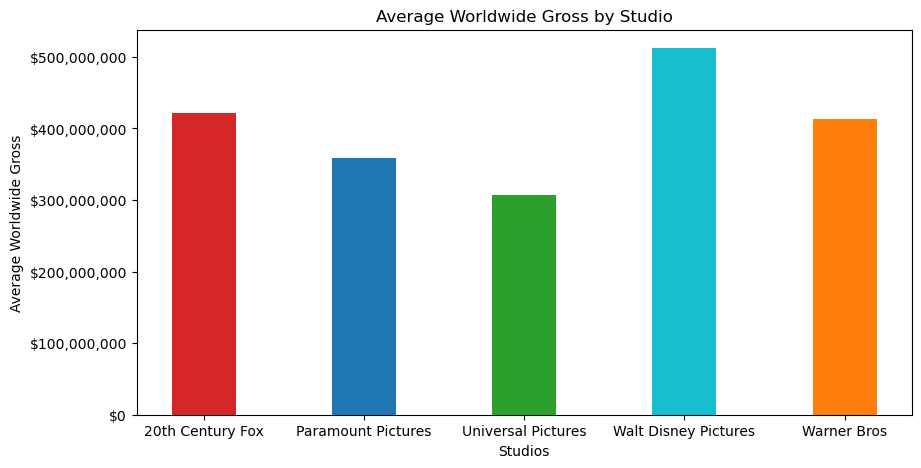

In [6]:
# create a bar chart for average worldwide_gross by studio
studios = studios_average_df['studio']
gross = studios_average_df['worldwide_gross']
colors = ['tab:red','tab:blue','tab:green','tab:cyan','tab:orange']

fig, ax = plt.subplots(1,1, figsize = (10,5))

plt.bar(studios, gross, color = colors, width = 0.4)
plt.xlabel("Studios")
plt.ylabel("Average Worldwide Gross")
plt.title("Average Worldwide Gross by Studio")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# plt.grid(axis = 'y')

plt.show()

In [7]:
# create dataframes of Main_Genre for each of the top 5 movie studios

fox_genre_df = studios_df.loc[df['studio'] == '20th Century Fox']
fox_genre_df = fox_genre_df.groupby('Main_Genre', as_index=False)['title'].count()

paramount_genre_df = studios_df.loc[df['studio'] == 'Paramount Pictures']
paramount_genre_df = paramount_genre_df.groupby('Main_Genre', as_index=False)['title'].count()

universal_genre_df = studios_df.loc[df['studio'] == 'Universal Pictures']
universal_genre_df = universal_genre_df.groupby('Main_Genre', as_index=False)['title'].count()

disney_genre_df = studios_df.loc[df['studio'] == 'Walt Disney Pictures']
disney_genre_df = disney_genre_df.groupby('Main_Genre', as_index=False)['worldwide_gross'].mean()
disney_sorted_df = disney_genre_df.sort_values('worldwide_gross', ascending=False)

warner_genre_df = studios_df.loc[df['studio'] == 'Warner Bros']
warner_genre_df = warner_genre_df.groupby('Main_Genre', as_index=False)['title'].count()

#fox_genre_df
#paramount_genre_df
#universal_genre_df
disney_sorted_df
#warner_genre_df

,Main_Genre,worldwide_gross
9,Sci-Fi,9.553376e+08
6,Fantasy,7.439514e+08
2,Comedy,6.694032e+08
0,Action,4.861896e+08
4,Drama,4.496894e+08
1,Animation,4.422954e+08
10,Thriller,3.747746e+08
7,Music,3.678097e+08
8,Romance,2.980003e+08
5,Family,2.567674e+08


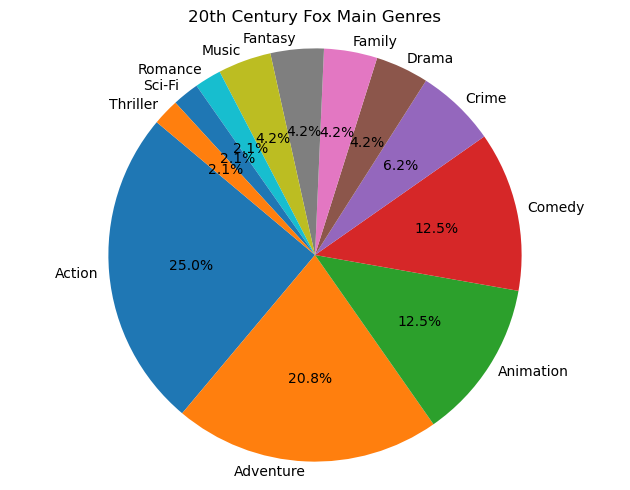

In [8]:
#create pie charts of genre data for 20th Century Fox
fox_genres = fox_genre_df['Main_Genre']
fox_films = fox_genre_df['title'].sort_values(ascending=False)

fig, ax = plt.subplots()
ax.pie(fox_films, labels=fox_genres, autopct='%1.1f%%', startangle=140, labeldistance=1.05)

plt.axis('equal')
plt.tight_layout()
plt.title("20th Century Fox Main Genres")

plt.show()

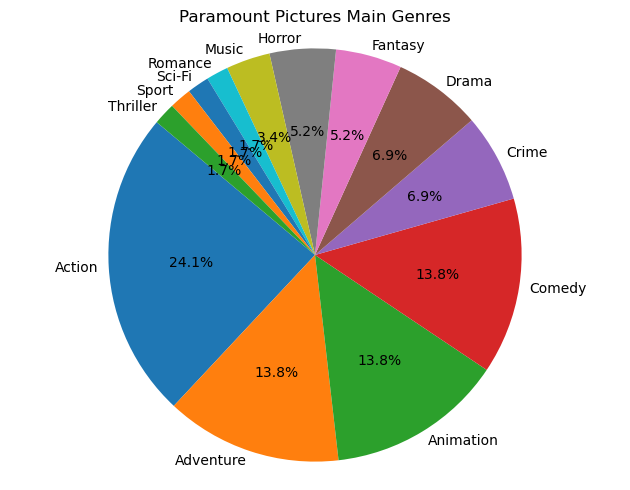

In [9]:
#create pie charts of genre data for Paramount Pictures
paramount_genres = paramount_genre_df['Main_Genre']
paramount_films = paramount_genre_df['title'].sort_values(ascending=False)

fig, ax = plt.subplots()
ax.pie(paramount_films, labels=paramount_genres, autopct='%1.1f%%', startangle=140, labeldistance=1.05)

plt.axis('equal')
plt.tight_layout()
plt.title("Paramount Pictures Main Genres")

plt.show()

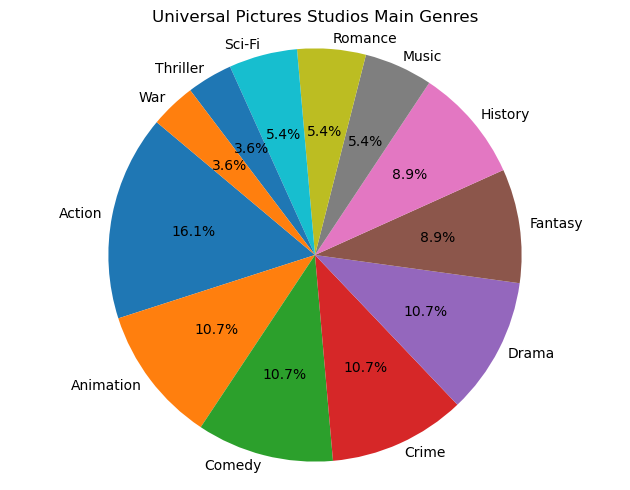

In [10]:
#create pie charts of genre data for Universal Pictures Studios
universal_genres = universal_genre_df['Main_Genre']
universal_films = universal_genre_df['title'].sort_values(ascending=False)

fig, ax = plt.subplots()
ax.pie(universal_films, labels=universal_genres, autopct='%1.1f%%', startangle=140, labeldistance=1.05)

plt.axis('equal')
plt.tight_layout()
plt.title("Universal Pictures Studios Main Genres")

plt.show()

In [11]:
#create pie charts of genre data for Walt Disney Pictures
disney_genres = disney_genre_df['Main_Genre']
disney_films = disney_genre_df['title'].sort_values(ascending=False)

fig, ax = plt.subplots()
ax.pie(disney_films, labels=disney_genres, autopct='%1.1f%%', startangle=140, labeldistance=1.05)

plt.axis('equal')
plt.tight_layout()
plt.title("Walt Disney Pictures Main Genres")

plt.show()

KeyError: 'title'

In [ ]:
#create pie charts of genre data for Warner Bros
warner_genres = warner_genre_df['Main_Genre']
warner_films = warner_genre_df['title'].sort_values(ascending=False)

fig, ax = plt.subplots()
ax.pie(warner_films, labels=warner_genres, autopct='%1.1f%%', startangle=140, labeldistance=1.05)

plt.axis('equal')
plt.tight_layout()
plt.title("Warner Bros Pictures Main Genres")

plt.show()

In [12]:
# create a dataframe with only columns used for some additional statistical measures
stats_df = studios_df[['year','length','imdb_rating','studio','title','worldwide_gross']]
stats_df

,year,length,imdb_rating,studio,title,worldwide_gross
0,2018,135,7.4,Walt Disney Pictures,Black Panther,700059566.0
1,2018,156,8.5,Walt Disney Pictures,Avengers: Infinity War,678815482.0
3,2018,129,6.2,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0
4,2018,119,7.8,20th Century Fox,Deadpool 2,318491426.0
5,2018,147,7.9,Paramount Pictures,Mission: Impossible - Fallout,220159104.0
...,...,...,...,...,...,...
428,1976,96,6.8,Warner Bros,The Enforcer,46236000.0
429,1976,132,6.7,Universal Pictures,Midway,43220000.0
430,1975,125,8.1,Warner Bros,Dog Day Afternoon,50000000.0
434,1975,100,6.2,Walt Disney Pictures,The Apple Dumpling Gang,36853000.0


In [13]:
# get the average IMDb rating of the top studios
rating_average_df = stats_df.groupby('studio', as_index=False)['imdb_rating'].mean()
rating_average_df

,studio,imdb_rating
0,20th Century Fox,7.127083
1,Paramount Pictures,6.965517
2,Universal Pictures,6.876786
3,Walt Disney Pictures,7.235385
4,Warner Bros,7.206897


In [29]:
# get the average length of the top studios
length_average_df = stats_df.groupby('studio', as_index=False)['length'].mean()
length_average_df

,studio,length
0,20th Century Fox,115.937500
1,Paramount Pictures,117.655172
2,Universal Pictures,117.428571
3,Walt Disney Pictures,116.646154
4,Warner Bros,128.563218


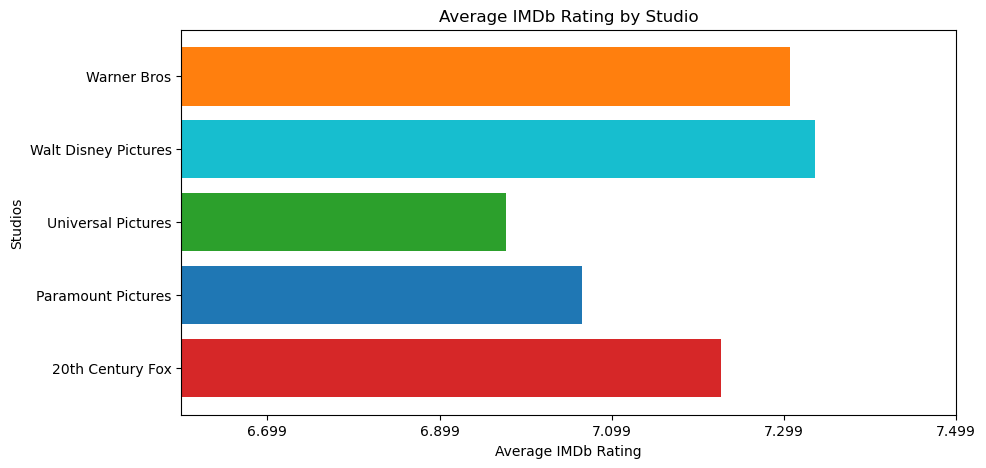

In [38]:
# create a bar chart for average imdb_rating by studio
studios = rating_average_df['studio']
rating = rating_average_df['imdb_rating']
colors = ['tab:red','tab:blue','tab:green','tab:cyan','tab:orange']

fig, ax = plt.subplots(1,1, figsize = (10,5))

plt.barh(studios, rating, color = colors)
plt.xlabel("Average IMDb Rating")
plt.ylabel("Studios")
plt.title("Average IMDb Rating by Studio")

#fmt = '{x:,.0f}'
#tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter('{x:9<5.1f}')
ax.set_xlim(xmin=6.5, xmax=7.4)

# plt.grid(axis = 'y')

plt.show()

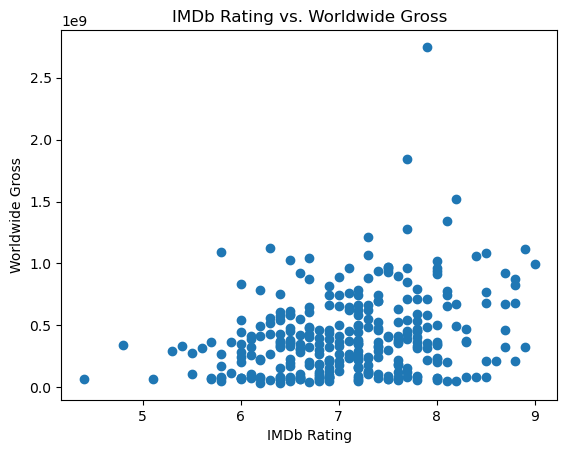

In [40]:
# create scatter plot of rating vs. worldwide_gross
rating = studios_df['imdb_rating']
gross = studios_df['worldwide_gross']

plt.scatter(rating, gross)
plt.xlabel("IMDb Rating")
plt.ylabel("Worldwide Gross")
plt.title("IMDb Rating vs. Worldwide Gross")
plt.show()


In [49]:
# check the correlation across rating and worldwide_gross
#corr = np.corrcoef(rating, gross)
#corr

stats.pearsonr(rating, gross)
#stats.spearmanr(rating, gross)
#stats.kendalltau(rating, gross)

PearsonRResult(statistic=0.2882121754457677, pvalue=2.020239538725967e-07)